In [64]:
import requests, zipfile, io
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression

## Example 1 - GPA x SAT
source: https://www.statcrunch.com/app/index.php?dataid=1583665

In [177]:
filepath = 'in.data/gpa_sat.csv'
df = pd.read_csv(filepath)
print(df.shape)
print(df.columns)
df.head()

(1000, 2)
Index(['GPA', 'SAT'], dtype='object')


,GPA,SAT
0,3.4,1270
1,4.0,1220
2,3.8,1160
3,3.8,950
4,4.0,1070


Text(0.5,1,'GPA x SAT')

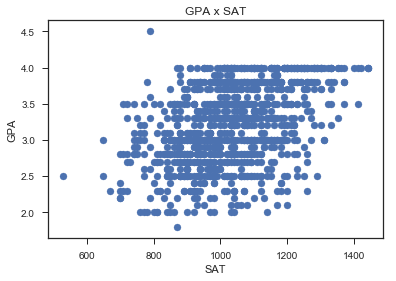

In [178]:
X = df.SAT
y = df.GPA

plt.scatter(X, y)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('GPA x SAT')

In [179]:
np.corrcoef(X,y)

array([[1.        , 0.42964857],
       [0.42964857, 1.        ]])

Coefficients:      [0.00170929]
Intercept:         1.4436481347639452
Mean squared error: 0.25
Variance score:     0.10


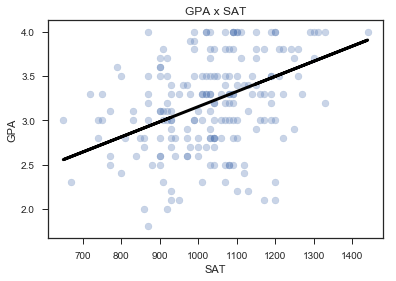

In [180]:
dfTrain, dfTest = train_test_split(df, test_size=0.2)
X_train = dfTrain.SAT[:, np.newaxis]
y_train = dfTrain.GPA

X_test = dfTest.SAT[:, np.newaxis]
y_test = dfTest.GPA



# Create linear regression object
regr = sk.linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, alpha=0.3)
plt.plot(X_test, y_pred, color='k', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('GPA x SAT')

plt.show()

# Example 2 - Gender, Age, Year in College, Hours of Sleep, GPA
## (working with dummies)
source: https://www.statcrunch.com/app/index.php?dataid=2213550

In [181]:
filepath = 'in.data/gpa_sleep.csv'
df = pd.read_csv(filepath)
print(df.shape)
print(df.columns)
df.head()

(80, 5)
Index(['Gender', 'Age', 'Year in College', 'Hours of Sleep', 'GPA'], dtype='object')


,Gender,Age,Year in College,Hours of Sleep,GPA
0,Female,22,4,7.0,3.80
1,Male,18,1,4.0,3.60
2,Male,19,2,9.0,3.50
3,Female,27,3,7.0,3.00
4,Female,37,3,5.0,3.61


In [182]:
dfWdummies = df.join(pd.get_dummies(df.Gender))
dfWdummies.head()

,Gender,Age,Year in College,Hours of Sleep,GPA,Female,Male
0,Female,22,4,7.0,3.80,1,0
1,Male,18,1,4.0,3.60,0,1
2,Male,19,2,9.0,3.50,0,1
3,Female,27,3,7.0,3.00,1,0
4,Female,37,3,5.0,3.61,1,0


In [201]:
dfTrain, dfTest = train_test_split(dfWdummies, test_size=0.1)

predictors = ['Age', 'Year in College', 'Hours of Sleep', 'Female', 'Male']

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain.GPA)

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest.GPA)

# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

# A constant model that always predicts the expected value of y, disregarding the input features, 
# would get a R^2 score of 0.0.

# considering only the mean values of y_train
print('Variance score (baseline): %.2f' % r2_score(y_test, [np.mean(y_train) for i in range(len(y_test))]))


Coefficients:      [ 0.00174167  0.00305446 -0.04878076  0.05206596 -0.05206596]
Intercept:         3.6316184258272983
Mean squared error: 0.13
Variance score:     -0.33
Variance score (baseline): -0.33


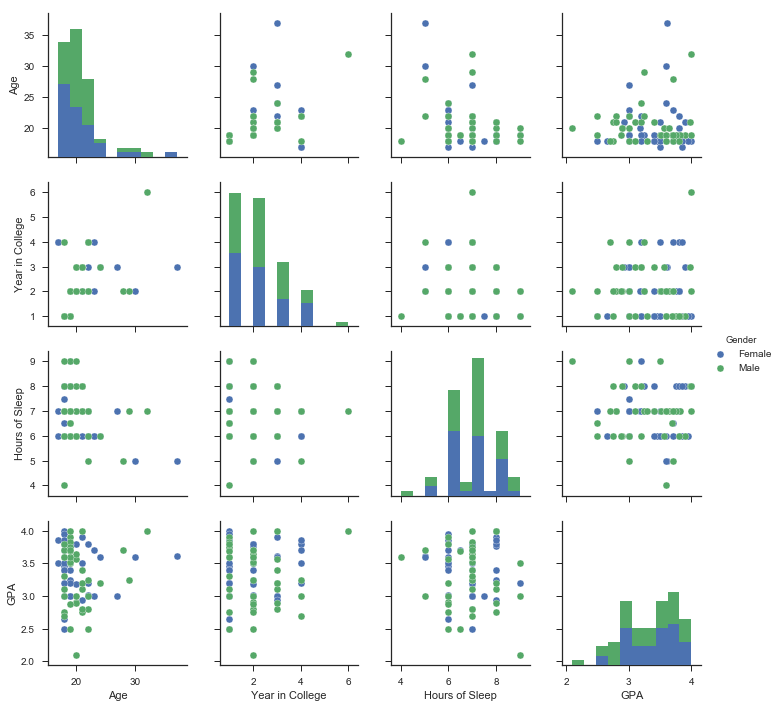

In [184]:
sns.set(style="ticks")
sns.pairplot(df, hue='Gender')

# Example 3 (reading CSV from zip file)

In [216]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
filename = 'student-mat.csv'

In [217]:
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content)) as myzip:
    with myzip.open(filename) as myfile:
        df = pd.read_csv(myfile, sep=';')

In [218]:
print(df.shape)
print(df.columns)
df.head()

(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


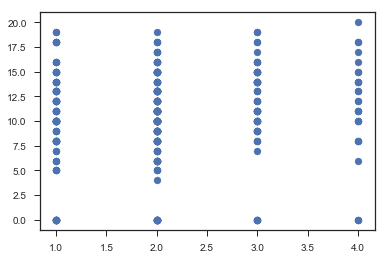

In [219]:
x = df['studytime']
y = df['G3']
plt.scatter(x, y)

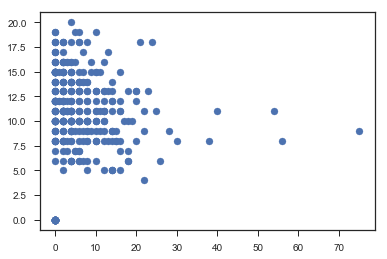

In [220]:
x = df['absences']
y = df['G3']
plt.scatter(x, y)

[Text(0,0.5,'G3'), Text(0.5,0,'G2')]

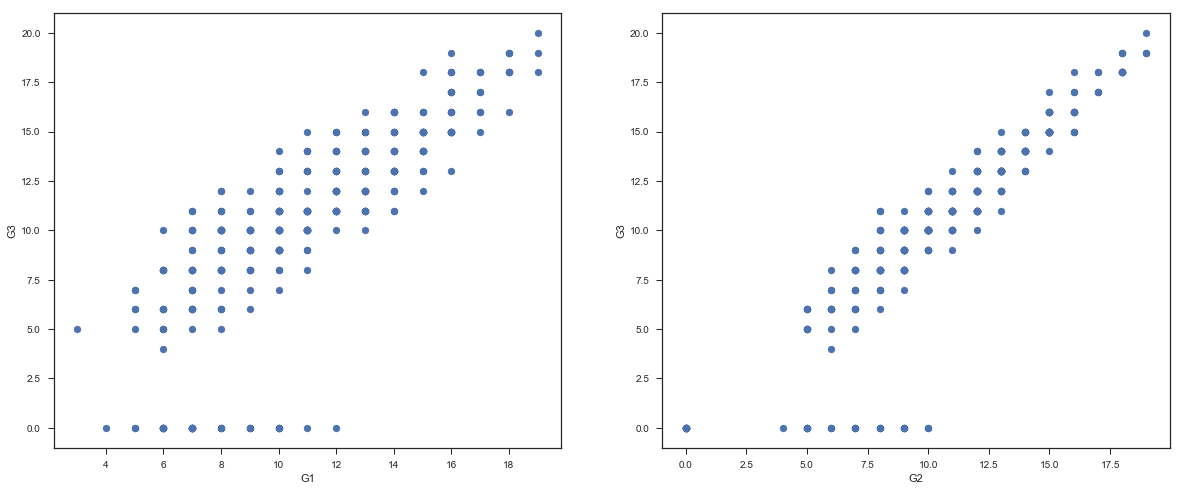

In [221]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
x1 = df['G1']
x2 = df['G2']
y = df['G3']

ax1.scatter(x1, y)
ax1.set(xlabel='G1', ylabel='G3')
ax2.scatter(x2, y)
ax2.set(xlabel='G2', ylabel='G3')


In [222]:
dfNoOutliers = df[df.G3 > 0]
dfNoOutliers.shape

(357, 33)

[Text(0,0.5,'G3'), Text(0.5,0,'G2')]

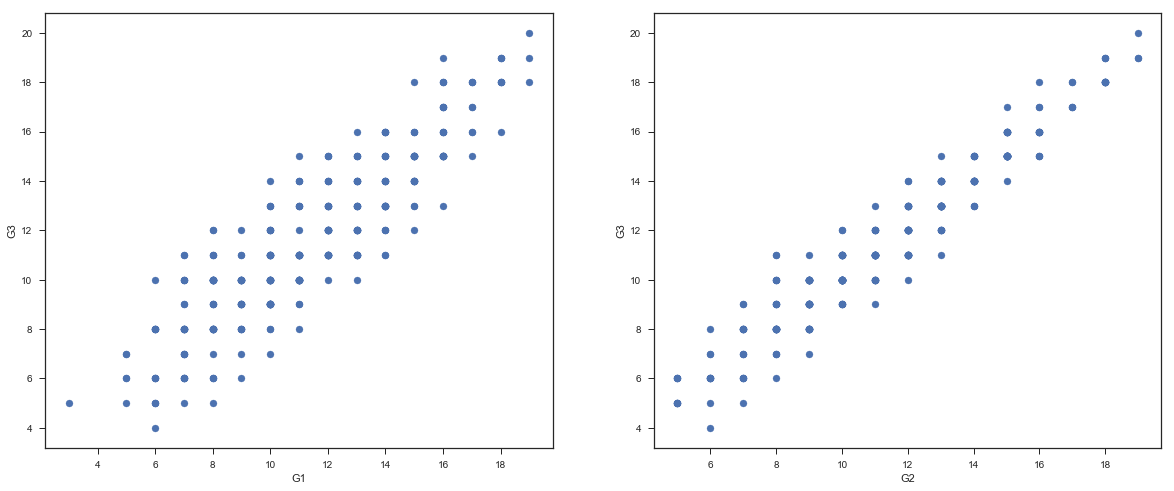

In [223]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
x1 = dfNoOutliers['G1']
x2 = dfNoOutliers['G2']
y = dfNoOutliers['G3']

ax1.scatter(x1, y)
ax1.set(xlabel='G1', ylabel='G3')
ax2.scatter(x2, y)
ax2.set(xlabel='G2', ylabel='G3')

In [224]:
print(np.corrcoef(df[['G1','G2','G3']], rowvar=False))

[[1.         0.85211807 0.80146793]
 [0.85211807 1.         0.90486799]
 [0.80146793 0.90486799 1.        ]]


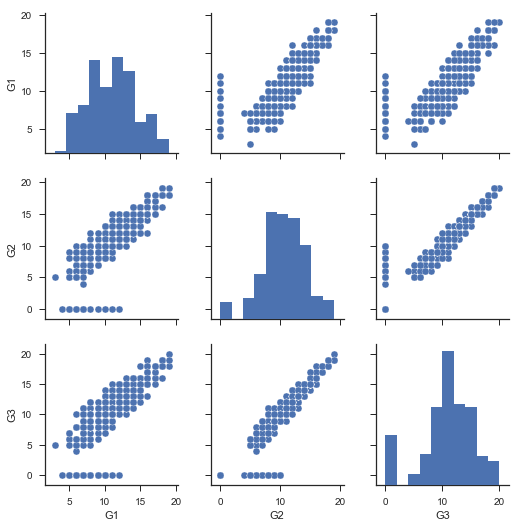

In [225]:
sns.set(style="ticks")
sns.pairplot(df[['G1', 'G2', 'G3']])

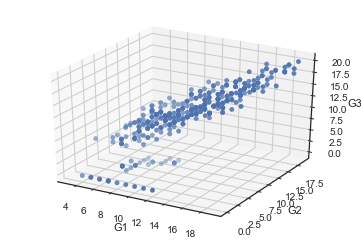

In [296]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.G1, df.G2, df.G3)
ax.set(xlabel='G1', ylabel='G2', zlabel='G3')
pass

In [265]:
dfTrain, dfTest = train_test_split(df, test_size=0.1)

predictors = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

X = np.array(df[predictors])
y = dfTrain.G3

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain.G3)

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest.G3)

# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

print('Ajusted R^2')
SS_Residual = sum((y_test - y_pred)**2)
SS_Total = sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual)) / SS_Total
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

Predictors:        ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']
Coefficients:      [-0.2134364   0.1248867  -0.19025574 -0.28524297  0.10019204  0.0937477
  0.0395561   0.17965775  0.95451911]
Intercept:         1.2460892757530484
Mean squared error: 2.65
Variance score:     0.88
Ajusted R^2
0.8763324919357546 0.839232239516481


### Evaluating the Model with Cross Validation

In [266]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics

predictors = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

X = df[predictors]
y = df.G3
N_FOLDS = 5

scores = cross_val_score(regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)


Cross-validated scores: [0.84146282 0.90072735 0.81537587 0.76824904 0.72136457]


## Ridge Regression
Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [267]:
dfTrain, dfTest = train_test_split(df, test_size=0.1)

predictors = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain.G3)

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest.G3)

# Create linear regression object
regr = sk.linear_model.Ridge(normalize=True, alpha=0.8)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

Predictors:        ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']
Coefficients:      [-0.17826122 -0.11694496  0.00600567 -0.38523551  0.05222353 -0.07108857
  0.02062565  0.35781221  0.43614011]
Intercept:         5.072591148364429
Mean squared error: 6.85
Variance score:     0.69


### Evaluating the Model with Cross Validation

In [269]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics

predictors = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

X = df[predictors]
y = df.G3
N_FOLDS = 5

scores = cross_val_score(regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)


Cross-validated scores: [0.79081744 0.77120721 0.76350302 0.6793935  0.59795791]


## Lasso Regression

In [278]:
dfTrain, dfTest = train_test_split(df, test_size=0.1)

predictors = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain.G3)

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest.G3)

# Create linear regression object
regr = sk.linear_model.Lasso(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

Predictors:        ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']
Coefficients:      [-0. -0.  0. -0.  0. -0.  0.  0.  0.]
Intercept:         10.43943661971831
Mean squared error: 20.52
Variance score:     -0.00


### Evaluating the Model with Cross Validation

In [275]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics

predictors = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

X = df[predictors]
y = df.G3
N_FOLDS = 5

scores = cross_val_score(regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)


Cross-validated scores: [-0.25953101 -0.02124044 -0.00884573 -0.00281582 -0.0268137 ]


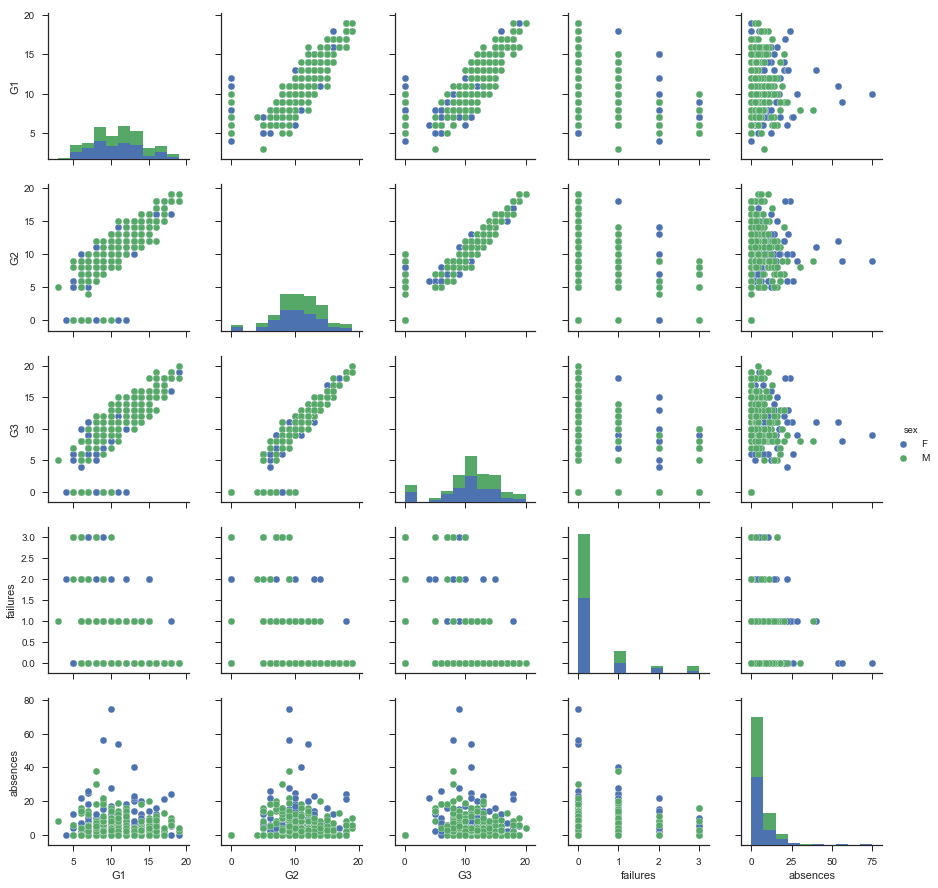

In [271]:
sns.set(style="ticks")
sns.pairplot(df[['G1', 'G2', 'G3', 'failures', 'absences', 'sex']], hue='sex')

# Logistic Regression

Follow the example at:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8